In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Salary%20Data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


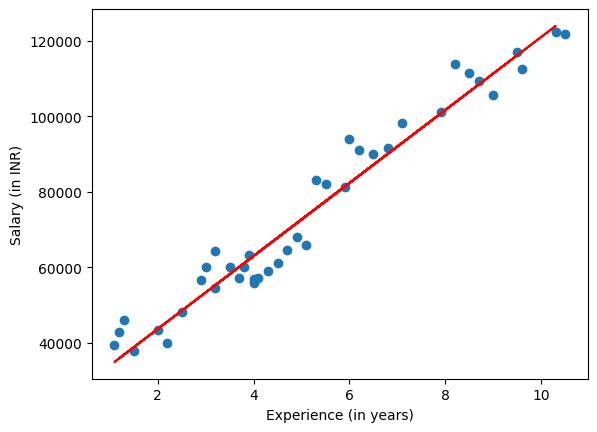

In [5]:
#plotting data to verify linear relationship
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in INR)')

#separating out experiences and corresponding salaries 
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

#importing 'train_test_split' function from 'model_selection' module under Scikit-learn library
from sklearn.model_selection import train_test_split
#splitting dataset into 50-50 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=2)

#importing 'LinearRegression' class from 'linear_model' module under Scikit-learn library
from sklearn.linear_model import LinearRegression
#creating an object
lin_reg = LinearRegression()
#fitting the SLR model using training data
lin_reg.fit(X_train,y_train)
#predicting the salaries for the testing-experiences data
y_predict = lin_reg.predict(X_test)

#plotting the SLR line
plt.plot(X_test,y_predict,color='red')

In [6]:
#calculating slope (m) and intercepts (b) of SLR
m = lin_reg.coef_
b = lin_reg.intercept_
print('Slope = ',m)
print('Intercept = ',b)

#importing and calculating the regression matrics to verify the model performance on testing data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ',mean_absolute_error(y_test,y_predict))
print('MSE: ',mean_squared_error(y_test,y_predict))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('R2-Score: ',r2_score(y_test,y_predict))
#adjusted R2-Score
n = X_test.shape[0]
k = 1
r2_scr = r2_score(y_test,y_predict)
r2_score_adjusted = 1-(((1-r2_scr)*(n-1))/(n-1-k))
print('Adjusted R2-Score: ',r2_score_adjusted)

Slope =  [9676.40055178]
Intercept =  24324.955224555604
MAE:  4188.418276145394
MSE:  24808503.80210796
RMSE:  4980.813568294638
R2-Score:  0.9619270377919448
Adjusted R2-Score:  0.9598118732248306


In [7]:
#verifying slope and intercept of simple regression line using ordinary least square (OLR) formulation
num = 0
den = 0
for i in range(X_train.shape[0]):
    num = num + ((X_train.values[i]-X_train.values.mean())*(y_train.values[i]-y_train.values.mean()))
    den = den + (X_train.values[i]-X_train.values.mean())**2
m = num/den
b = y_train.values.mean()-(m*X_train.values.mean())
print('m =',  m)
print('b= ', b)

m = [9676.40055178]
b=  [24324.95522456]
